In [14]:
!pip install gdown

import gdown
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
gdown.download(url, 'Customers.csv', quiet=False)
url = 'https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
gdown.download(url, 'Products.csv', quiet=False)
url = 'https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'
gdown.download(url, 'Transactions.csv', quiet=False)
D_customers = pd.read_csv('Customers.csv')
D_products = pd.read_csv('Products.csv')
D_transactions = pd.read_csv('Transactions.csv')
print("Customers Data:")
print(D_customers.head())

print("\nProducts Data:")
print(D_products.head())

print("\nTransactions Data:")
print(D_transactions.head())


Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 18.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 7.78MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 62.2MB/s]

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [15]:
print("Missing values in Customers Data:")
print(D_customers.isnull().sum())

print("\nMissing values in Products Data:")
print(D_products.isnull().sum())

print("\nMissing values in Transactions Data:")
print(D_transactions.isnull().sum())

print("\nData types in Customers Data:")
print(D_customers.dtypes)

print("\nData types in Products Data:")
print(D_products.dtypes)

print("\nData types in Transactions Data:")
print(D_transactions.dtypes)


Missing values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Data types in Customers Data:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Data types in Products Data:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Data types in Transactions Data:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [17]:
print("\nBasic Statistics - Customers Data:")
print(D_customers.describe())

print("\nBasic Statistics - Products Data:")
print(D_products.describe())

print("\nBasic Statistics - Transactions Data:")
print(D_transactions.describe())



Basic Statistics - Customers Data:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Basic Statistics - Products Data:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Basic Statistics - Transactions Data:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [18]:
print("\nUnique values in 'Region' column (Customers Data):")
print(D_customers['Region'].unique())

print("\nUnique values in 'Category' column (Products Data):")
print(D_products['Category'].unique())



Unique values in 'Region' column (Customers Data):
['South America' 'Asia' 'North America' 'Europe']

Unique values in 'Category' column (Products Data):
['Books' 'Electronics' 'Home Decor' 'Clothing']


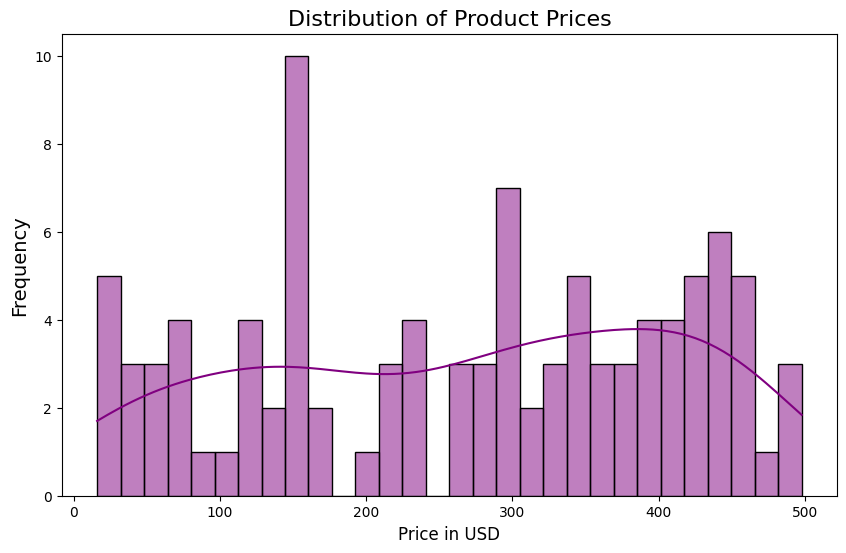

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(D_products['Price'], bins=30, kde=True,color='purple')
plt.title('Distribution of Product Prices',fontsize=16)
plt.xlabel('Price in USD',fontsize=12)
plt.ylabel('Frequency',fontsize=14)
plt.show()


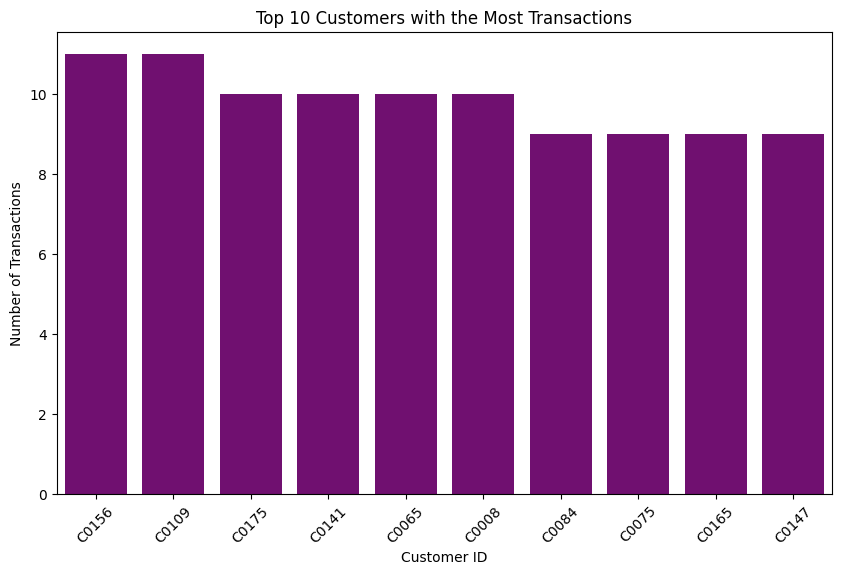

In [21]:
customer_transactions = transactions.groupby('CustomerID').size().reset_index(name='TotalTransactions')

plt.figure(figsize=(10,6))
sns.barplot(x='CustomerID', y='TotalTransactions', data=customer_transactions.sort_values('TotalTransactions', ascending=False).head(10),color='purple')
plt.title('Top 10 Customers with the Most Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-4bbc03910b9b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=D_customers, palette='coolwarm', order=D_customers['Region'].value_counts().index)


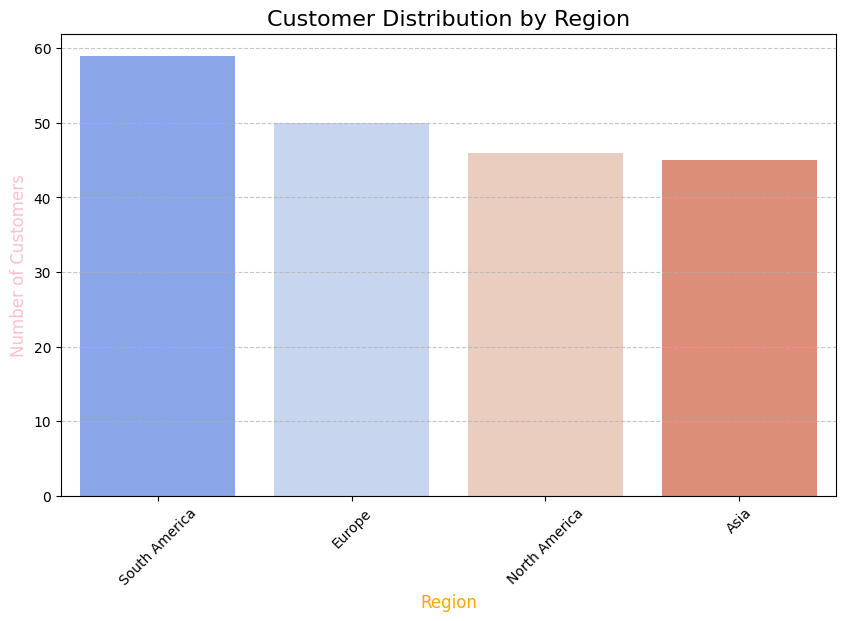

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=D_customers, palette='coolwarm', order=D_customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12,color = 'orange')
plt.ylabel('Number of Customers', fontsize=12 , color = 'pink')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
top_region = customers['Region'].value_counts().idxmax()
top_region_count = customers['Region'].value_counts().max()

print(f"Top Region: {top_region} with {top_region_count} customers")


Top Region: South America with 59 customers


In [29]:
price_range_count = products[(products['Price'] >= 10) & (products['Price'] <= 50)].shape[0]

print(f"Number of products in the price range $10-$50: {price_range_count}")


Number of products in the price range $10-$50: 9
